In [1]:
import scipy.io
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import numpy as np
import pickle
import seaborn as sns

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 1, 's' : 40, 'linewidths':0}

In [2]:
#test_data= pd.read_excel('C:/Users/Bhupesh/Documents/MATLAB/Project/datas/Normalized_HDB_KR.xlsx')
#df = pd.DataFrame(test_data)

In [3]:
df= pd.read_excel('C:/Users/Bhupesh/Documents/MATLAB/Project/my raw data/KT_KR_2_7_my_new.xlsx',sheet_name='Sheet4')

In [4]:
df=df.loc[:,['KR','Tavg']]
df.head

<bound method NDFrame.head of                KR      Tavg
0        5.205019  0.000344
1      143.314206  0.001031
2      263.937469  0.002061
3      486.626956  0.003432
4      700.104678  0.005143
..            ...       ...
355   5670.204191  0.000482
356   6210.790597  0.000317
357   8469.001310  0.000180
358  14357.644353  0.000077
359  34501.455822  0.000015

[360 rows x 2 columns]>

In [5]:
df['KR']=np.log(df['KR'])
df['Tavg']=np.log(df['Tavg'])
#df['KT']=np.log(df['KT'])

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scalar=MinMaxScaler()
scalar.fit(df)
Norm=scalar.transform(df)
df[['KR','Tavg']]=Norm
df

,KR,Tavg
0,1.734723e-18,0.026747
1,3.171494e-03,0.082689
2,3.043751e-03,0.166488
3,3.410610e-03,0.278058
4,4.074287e-03,0.417303
...,...,...
355,1.356718e-02,0.037965
356,2.887997e-04,0.024526
357,1.138328e-02,0.013388
358,1.183593e-01,0.005048


In [6]:
from sklearn.covariance import EllipticEnvelope
outlier_frac = 0.05
ell = EllipticEnvelope(contamination=outlier_frac)
ell.fit(df)

EllipticEnvelope(contamination=0.05)

In [11]:
from sklearn.covariance import EllipticEnvelope
# Let it discard as many points as it wants in fitting
ell = EllipticEnvelope()
ell.fit(df)
pred = ell.predict(df)

In [12]:
# Binary prediction of normal vs. outlier
pred = ell.predict(df)
sum(pred == -1)  # Outlier points are predicted as -1

36

In [9]:
# Continuous output of the decision_function
#decision = ell.decision_function(df)
#decision.min(), decision.max()

(-207.91829379571948, 96.35598818173668)

In [122]:
# Get the "thresholding" value from the decision function
#threshold = stats.scoreatpercentile(ell.decision_function(df), 100*outlier_frac)
#threshold

-159746.38632705706

In [59]:
Norm=scalar.inverse_transform(df)
df[['KR','Tavg']]=Norm
df

NameError: name 'scalar' is not defined

In [13]:
df['label']= pred

Text(0, 0.5, '$log(K_R)$')

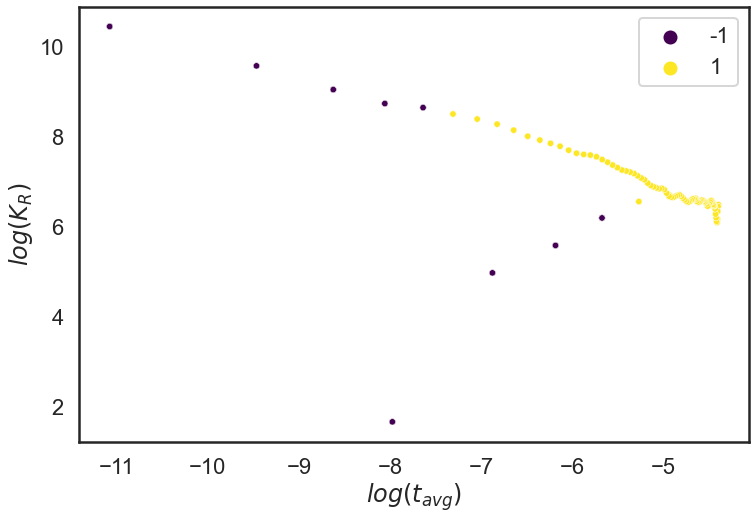

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Tavg',y='KR',hue=pred,palette='viridis', **plot_kwds)
plt.xlabel(r'$log(t_{avg})$')
plt.ylabel(r'$log(K_R)$')

In [100]:
rx=df[(df['label']!=-1)]
rx

,KR,Tavg,label
4,6.551230,-5.270159,1
5,6.696150,-4.934729,1
6,6.624880,-4.648140,1
7,6.481457,-4.397971,1
8,6.440509,-4.401210,1
...,...,...,...
350,8.006124,-6.489398,1
351,8.141615,-6.643220,1
352,8.275429,-6.825447,1
353,8.388614,-7.044092,1


Text(0, 0.5, 'Log KR')

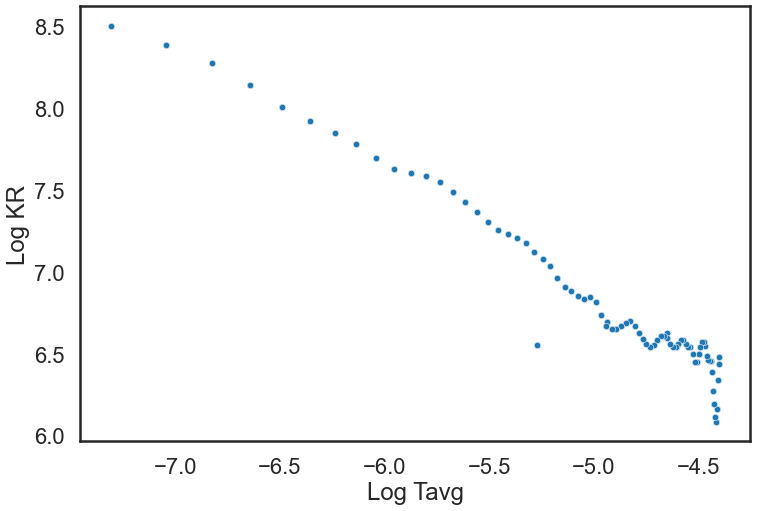

In [101]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=rx,x='Tavg',y='KR', **plot_kwds)
plt.xlabel('Log Tavg')
plt.ylabel('Log KR')

In [102]:
rx=rx[['KR','Tavg']]

In [41]:
scalar=MinMaxScaler()
scalar.fit(rx)
Norm=scalar.transform(rx)
rx[['KR','Tavg']]=Norm
rx

<ipython-input-41-f3ff8ec6a1c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rx[['KR','Tavg']]=Norm
C:\Users\Bhupesh\anaconda3\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Bhupesh\anaconda3\lib\site-packages\pandas\core\frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,KR,Tavg
0,0.209260,0.013540
1,0.283760,0.070241
2,0.415692,0.155178
3,0.460308,0.268261
4,0.368271,0.409395
...,...,...
338,0.750602,0.216733
339,0.799739,0.199172
340,0.853101,0.181546
341,0.936905,0.163860


In [45]:
ell = EllipticEnvelope()
ell.fit(rx)
pred = ell.predict(rx)

In [103]:
from sklearn.covariance import EllipticEnvelope
outlier_frac = 0.122
ell = EllipticEnvelope(contamination=outlier_frac)
ell.fit(rx)

EllipticEnvelope(contamination=0.122)

In [104]:
pred = ell.predict(rx)
sum(pred == -1)  # Outlier points are predicted as -1

40

In [68]:
Norm=scalar.inverse_transform(rx)
rx[['KR','Tavg']]=Norm
rx

<ipython-input-68-937e87c77fed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rx[['KR','Tavg']]=Norm
C:\Users\Bhupesh\anaconda3\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Bhupesh\anaconda3\lib\site-packages\pandas\core\frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,KR,Tavg
0,2.303496e+07,0.000033
1,4.700155e+07,0.000052
2,4.603621e+07,0.000080
3,4.880852e+07,0.000118
4,5.382385e+07,0.000165
...,...,...
346,1.492334e+08,0.000089
347,1.735734e+08,0.000083
355,1.255605e+08,0.000037
356,2.521739e+07,0.000032


In [105]:
rx['label']= pred

Text(0, 0.5, 'Log KR')

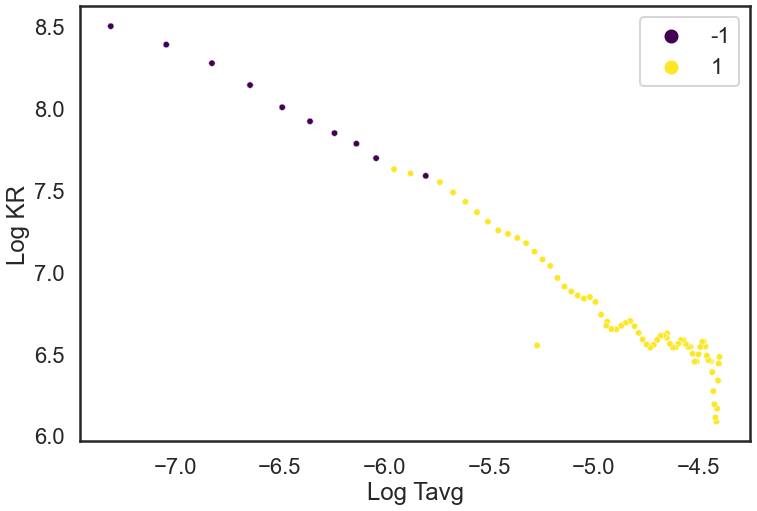

In [106]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=rx,x='Tavg',y='KR',hue=pred,palette='viridis', **plot_kwds)
plt.xlabel('Log Tavg')
plt.ylabel('Log KR')

In [88]:
rx=rx[(rx['label']!=-1)]
rx

,KR,Tavg,label
4,6.551230,-5.270159,1
5,6.696150,-4.934729,1
6,6.624880,-4.648140,1
7,6.481457,-4.397971,1
8,6.440509,-4.401210,1
...,...,...,...
341,7.485858,-5.672133,1
342,7.548839,-5.735149,1
343,7.586983,-5.802730,1
344,7.601576,-5.875540,1


In [89]:
rx['KR']=np.exp(df['KR'])
rx['Tavg']=np.exp(rx['Tavg'])
#rx['KT']=np.exp(rx['KT'])

<AxesSubplot:xlabel='Tavg', ylabel='KR'>

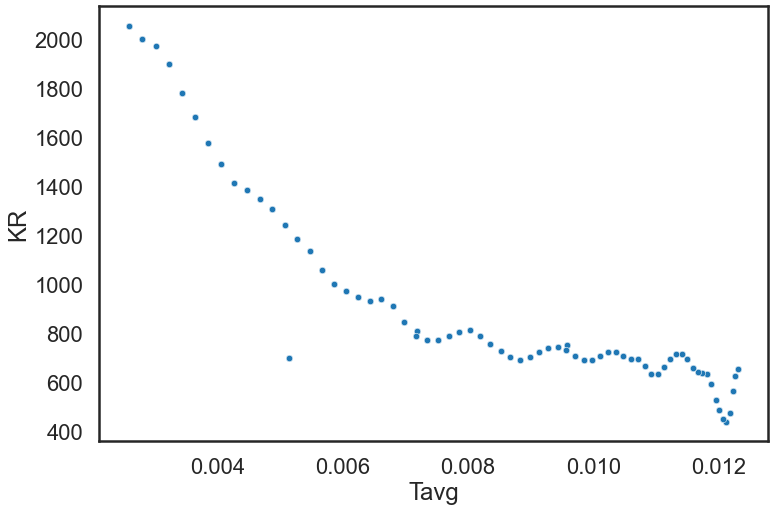

In [90]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=rx,x='Tavg',y='KR', **plot_kwds)

In [53]:
rx.to_excel(r'C:\Users\Bhupesh\Documents\MATLAB\Project\my raw data\KR_final_data_my.xlsx',sheet_name='Sheet4')